In [ ]:

# Wine Dataset Clustering Lab
# Name: Milan Bista
# Course: MSCS 634 - Data Mining
# Assignment: Lab 5 - Hierarchical and DBSCAN Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

STEP 1: DATA PREPARATION AND EXPLORATION
Dataset Overview:
Shape: (178, 14)
Features: 13
Classes: 3
Class names: ['class_0' 'class_1' 'class_2']

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18         

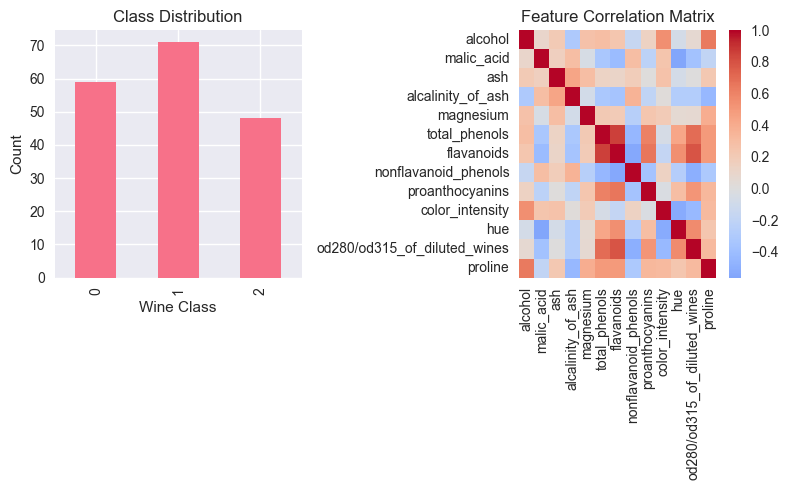


Features standardized. Shape: (178, 13)
Mean of scaled features: [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17]...
Std of scaled features: [1. 1. 1. 1. 1.]...


In [2]:
# ============================================================================
# STEP 1: DATA PREPARATION AND EXPLORATION
# ============================================================================

print("="*60)
print("STEP 1: DATA PREPARATION AND EXPLORATION")
print("="*60)

# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=wine_data.feature_names)
df['target'] = y

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Features: {len(wine_data.feature_names)}")
print(f"Classes: {len(wine_data.target_names)}")
print(f"Class names: {wine_data.target_names}")

# Examine dataset structure
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Check class distribution
print(f"\nClass Distribution:")
print(df['target'].value_counts().sort_index())

# Visualize class distribution
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
df['target'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')

# Visualize feature correlations
plt.subplot(1, 2, 2)
correlation_matrix = df.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeatures standardized. Shape: {X_scaled.shape}")
print(f"Mean of scaled features: {np.mean(X_scaled, axis=0)[:5]}...")
print(f"Std of scaled features: {np.std(X_scaled, axis=0)[:5]}...")



STEP 2: HIERARCHICAL CLUSTERING


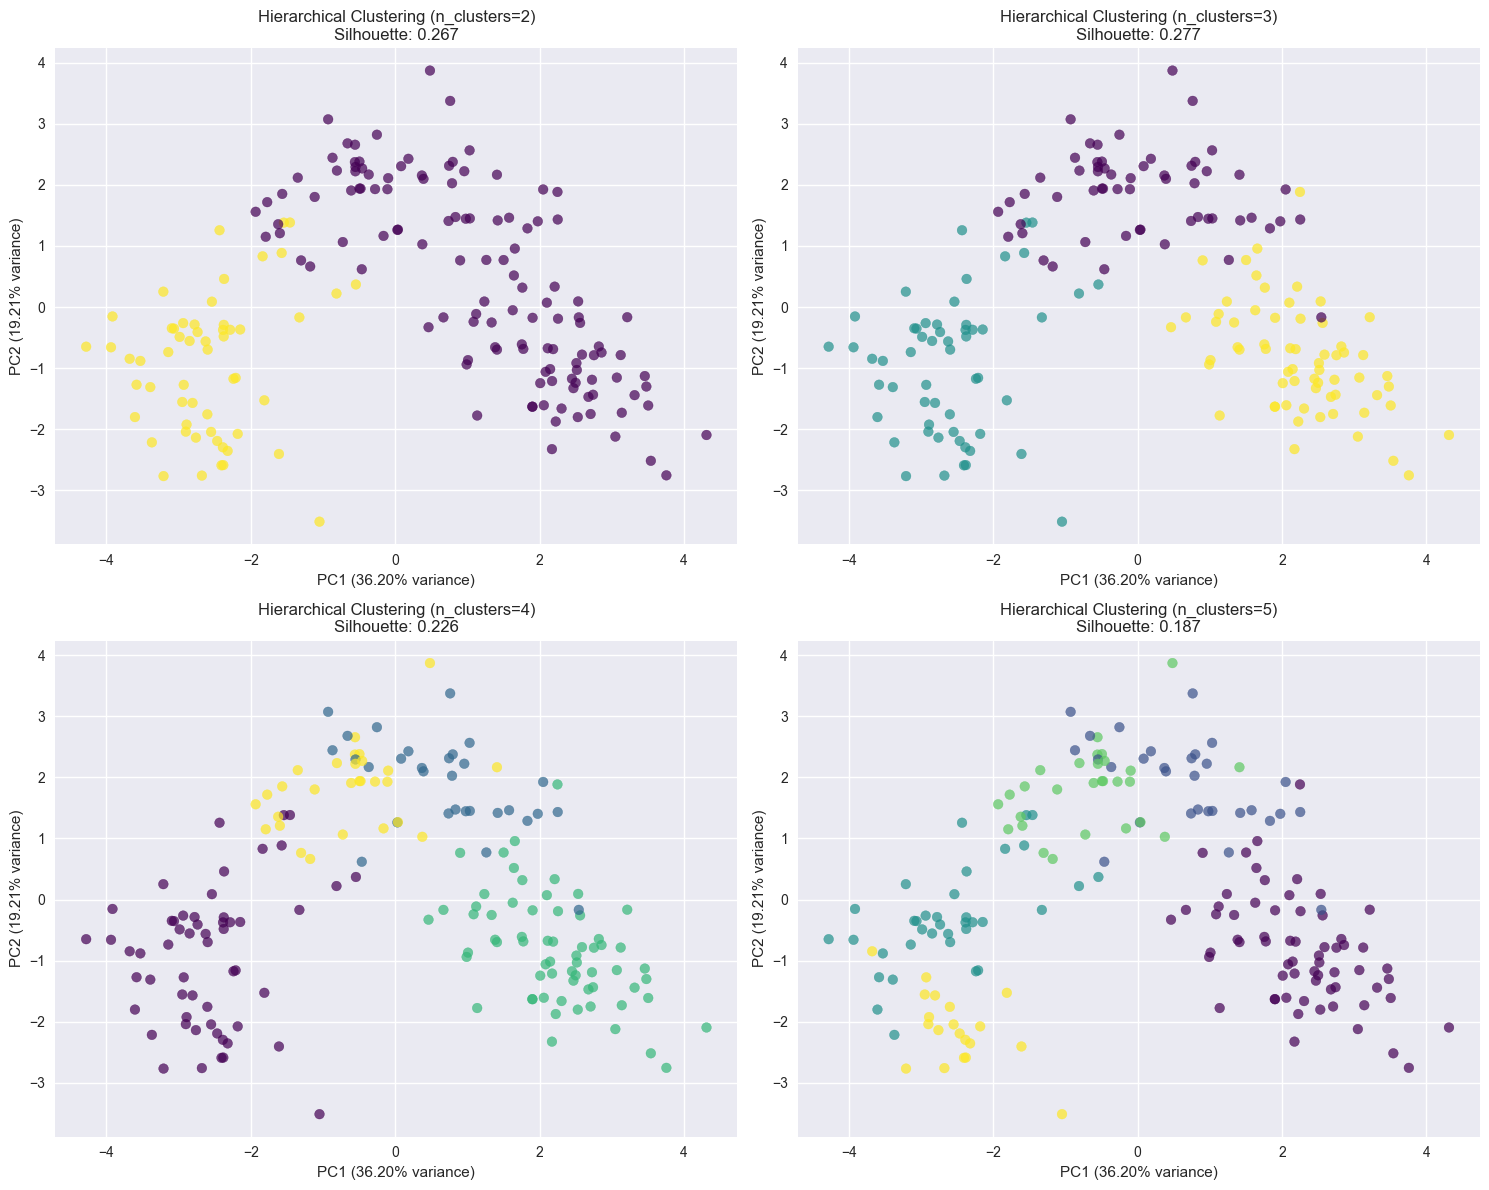


Hierarchical Clustering Results:
--------------------------------------------------
n_clusters = 2:
  Silhouette Score: 0.267
  Homogeneity Score: 0.444
  Completeness Score: 0.774

n_clusters = 3:
  Silhouette Score: 0.277
  Homogeneity Score: 0.790
  Completeness Score: 0.783

n_clusters = 4:
  Silhouette Score: 0.226
  Homogeneity Score: 0.790
  Completeness Score: 0.649

n_clusters = 5:
  Silhouette Score: 0.187
  Homogeneity Score: 0.811
  Completeness Score: 0.576

Generating Dendrogram...


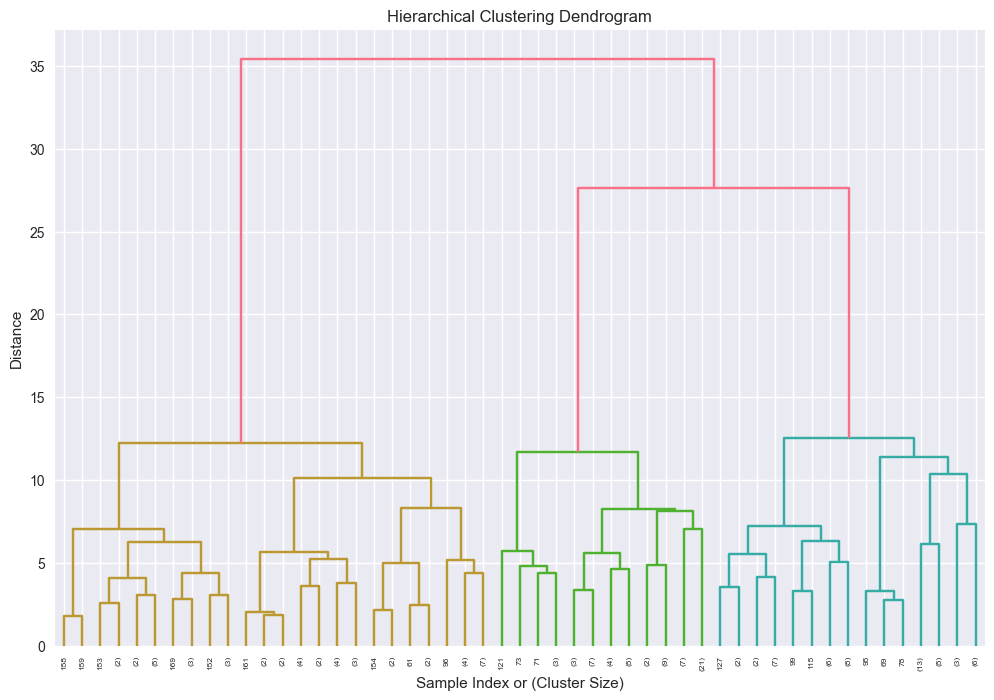

In [3]:
# ============================================================================
# STEP 2: HIERARCHICAL CLUSTERING
# ============================================================================

print("\n" + "="*60)
print("STEP 2: HIERARCHICAL CLUSTERING")
print("="*60)

# Test different numbers of clusters
n_clusters_range = [2, 3, 4, 5]
hierarchical_results = {}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, n_clusters in enumerate(n_clusters_range):
    # Apply Agglomerative Clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = hierarchical.fit_predict(X_scaled)
    
    # Calculate metrics
    silhouette = silhouette_score(X_scaled, cluster_labels)
    homogeneity = homogeneity_score(y, cluster_labels)
    completeness = completeness_score(y, cluster_labels)
    
    hierarchical_results[n_clusters] = {
        'labels': cluster_labels,
        'silhouette': silhouette,
        'homogeneity': homogeneity,
        'completeness': completeness
    }
    
    # Visualize clusters (using first two principal components for visualization)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
    axes[i].set_title(f'Hierarchical Clustering (n_clusters={n_clusters})\n'
                     f'Silhouette: {silhouette:.3f}')
    axes[i].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    axes[i].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

plt.tight_layout()
plt.show()

# Print results summary
print("\nHierarchical Clustering Results:")
print("-" * 50)
for n_clusters, results in hierarchical_results.items():
    print(f"n_clusters = {n_clusters}:")
    print(f"  Silhouette Score: {results['silhouette']:.3f}")
    print(f"  Homogeneity Score: {results['homogeneity']:.3f}")
    print(f"  Completeness Score: {results['completeness']:.3f}")
    print()

# Generate and visualize dendrogram
print("Generating Dendrogram...")
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


STEP 3: DBSCAN CLUSTERING
Testing DBSCAN parameters...
----------------------------------------
eps=0.5, min_samples=5: clusters=0, noise=178, silhouette=0.000
eps=0.5, min_samples=10: clusters=0, noise=178, silhouette=0.000
eps=0.5, min_samples=15: clusters=0, noise=178, silhouette=0.000
eps=1.0, min_samples=5: clusters=0, noise=178, silhouette=0.000
eps=1.0, min_samples=10: clusters=0, noise=178, silhouette=0.000
eps=1.0, min_samples=15: clusters=0, noise=178, silhouette=0.000
eps=1.5, min_samples=5: clusters=0, noise=178, silhouette=0.000
eps=1.5, min_samples=10: clusters=0, noise=178, silhouette=0.000
eps=1.5, min_samples=15: clusters=0, noise=178, silhouette=0.000
eps=2.0, min_samples=5: clusters=5, noise=85, silhouette=-0.033
eps=2.0, min_samples=10: clusters=1, noise=139, silhouette=0.000
eps=2.0, min_samples=15: clusters=0, noise=178, silhouette=0.000

Best parameters: eps=2.0, min_samples=5
Best Silhouette Score: -0.033


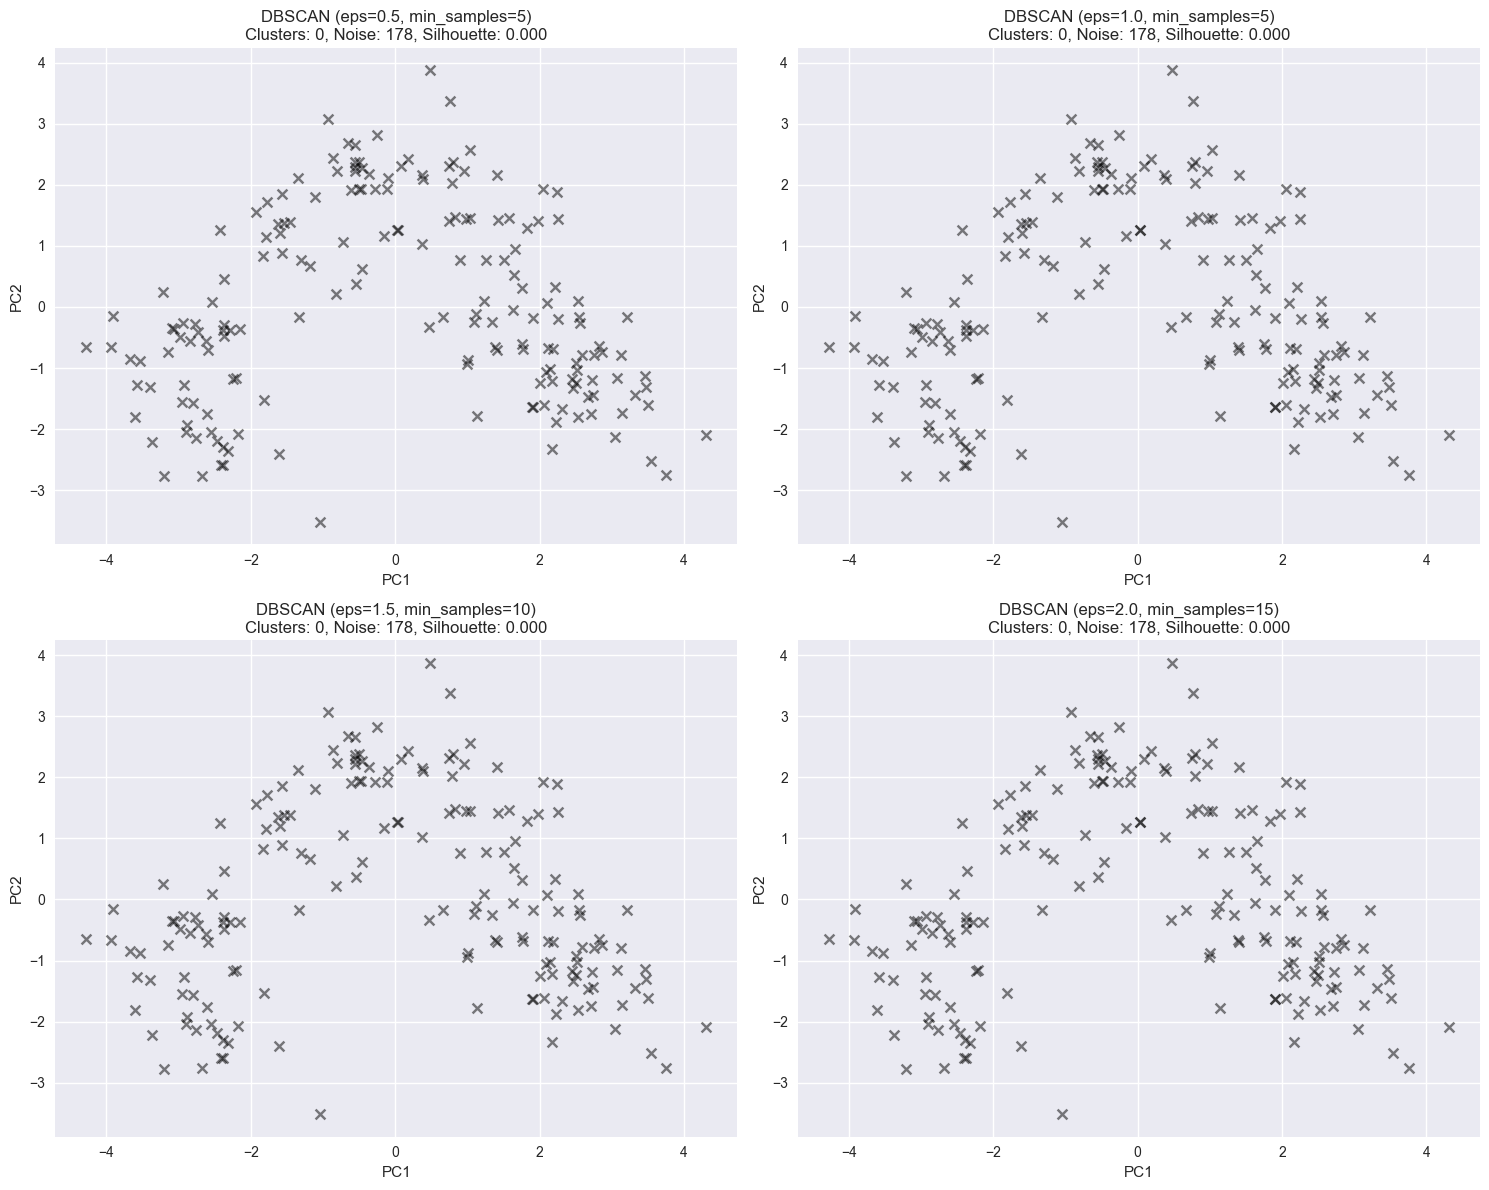


Detailed Results for Best Parameters (eps=2.0, min_samples=5):
------------------------------------------------------------
Number of clusters: 5
Number of noise points: 85
Silhouette Score: -0.033
Homogeneity Score: 0.362
Completeness Score: 0.325


In [4]:
# STEP 3: DBSCAN CLUSTERING
# ============================================================================

print("\n" + "="*60)
print("STEP 3: DBSCAN CLUSTERING")
print("="*60)

# Test different parameter combinations
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15]

dbscan_results = {}
best_silhouette = -1
best_params = None

print("Testing DBSCAN parameters...")
print("-" * 40)

for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)
        
        # Count clusters and noise points
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)
        
        # Calculate metrics (only if we have more than 1 cluster)
        if n_clusters > 1:
            silhouette = silhouette_score(X_scaled, cluster_labels)
            homogeneity = homogeneity_score(y, cluster_labels)
            completeness = completeness_score(y, cluster_labels)
            
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params = (eps, min_samples)
        else:
            silhouette = homogeneity = completeness = 0.0
        
        dbscan_results[(eps, min_samples)] = {
            'labels': cluster_labels,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette,
            'homogeneity': homogeneity,
            'completeness': completeness
        }
        
        print(f"eps={eps}, min_samples={min_samples}: "
              f"clusters={n_clusters}, noise={n_noise}, silhouette={silhouette:.3f}")

print(f"\nBest parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best Silhouette Score: {best_silhouette:.3f}")

# Visualize DBSCAN results for different parameter combinations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

selected_params = [(0.5, 5), (1.0, 5), (1.5, 10), (2.0, 15)]

for i, (eps, min_samples) in enumerate(selected_params):
    cluster_labels = dbscan_results[(eps, min_samples)]['labels']
    n_clusters = dbscan_results[(eps, min_samples)]['n_clusters']
    n_noise = dbscan_results[(eps, min_samples)]['n_noise']
    silhouette = dbscan_results[(eps, min_samples)]['silhouette']
    
    # Create scatter plot
    unique_labels = set(cluster_labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Noise points in black
            col = 'black'
            marker = 'x'
            alpha = 0.5
        else:
            marker = 'o'
            alpha = 0.7
        
        class_member_mask = (cluster_labels == k)
        xy = X_pca[class_member_mask]
        axes[i].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, alpha=alpha, s=50)
    
    axes[i].set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})\n'
                     f'Clusters: {n_clusters}, Noise: {n_noise}, Silhouette: {silhouette:.3f}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')

plt.tight_layout()
plt.show()

# Detailed results for best parameters
best_eps, best_min_samples = best_params
best_results = dbscan_results[best_params]

print(f"\nDetailed Results for Best Parameters (eps={best_eps}, min_samples={best_min_samples}):")
print("-" * 60)
print(f"Number of clusters: {best_results['n_clusters']}")
print(f"Number of noise points: {best_results['n_noise']}")
print(f"Silhouette Score: {best_results['silhouette']:.3f}")
print(f"Homogeneity Score: {best_results['homogeneity']:.3f}")
print(f"Completeness Score: {best_results['completeness']:.3f}")


STEP 4: ANALYSIS AND INSIGHTS
COMPARISON BETWEEN HIERARCHICAL AND DBSCAN CLUSTERING:
-------------------------------------------------------
Best Hierarchical Clustering (n_clusters=3):
  Silhouette Score: 0.277
  Homogeneity Score: 0.790
  Completeness Score: 0.783

Best DBSCAN Clustering (eps=2.0, min_samples=5):
  Silhouette Score: -0.033
  Homogeneity Score: 0.362
  Completeness Score: 0.325
  Noise Points: 85


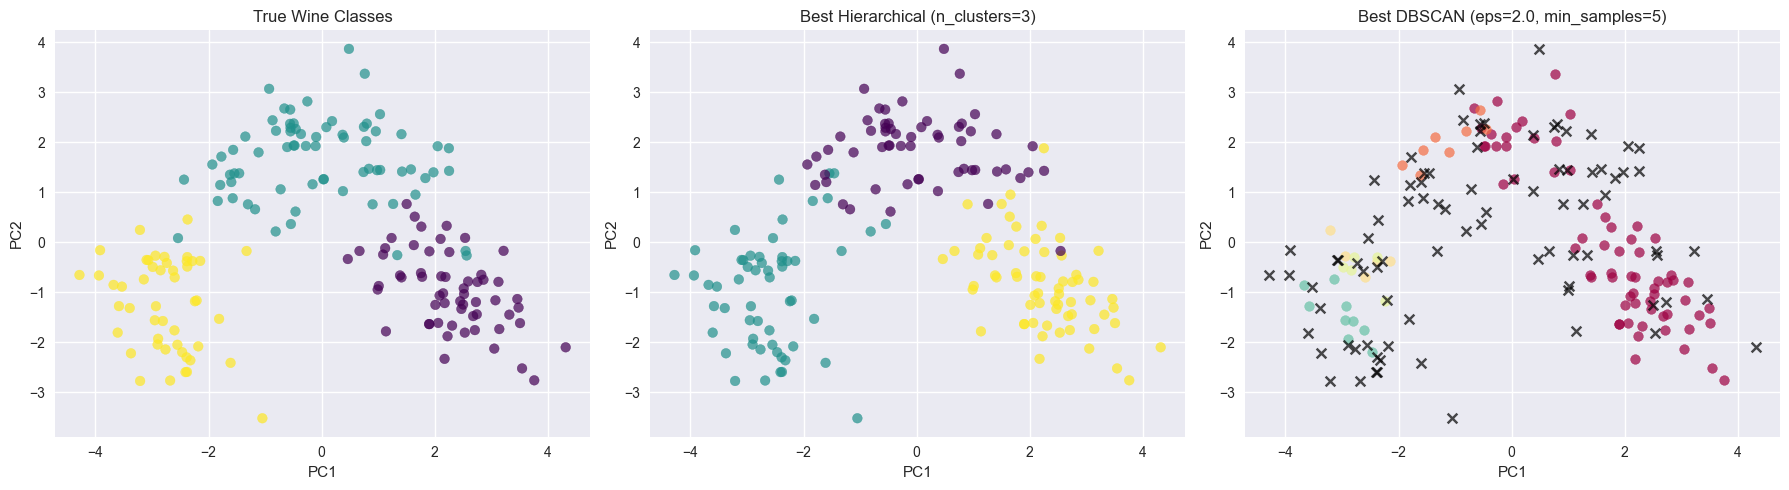


ANALYSIS SUMMARY:
--------------------
Clustering analysis complete!
For detailed insights and conclusions, please refer to the README.md file.

Quick Summary:
- Best Hierarchical: n_clusters=3, Silhouette=0.277
- Best DBSCAN: eps=2.0, min_samples=5, Silhouette=-0.033
- Winner: Hierarchical clustering


In [6]:
# ============================================================================
# STEP 4: ANALYSIS AND INSIGHTS
# ============================================================================

print("\n" + "="*60)
print("STEP 4: ANALYSIS AND INSIGHTS")
print("="*60)

# Find best hierarchical clustering result
best_hierarchical_n = max(hierarchical_results.keys(), 
                         key=lambda k: hierarchical_results[k]['silhouette'])
best_hierarchical = hierarchical_results[best_hierarchical_n]

print("COMPARISON BETWEEN HIERARCHICAL AND DBSCAN CLUSTERING:")
print("-" * 55)
print(f"Best Hierarchical Clustering (n_clusters={best_hierarchical_n}):")
print(f"  Silhouette Score: {best_hierarchical['silhouette']:.3f}")
print(f"  Homogeneity Score: {best_hierarchical['homogeneity']:.3f}")
print(f"  Completeness Score: {best_hierarchical['completeness']:.3f}")
print()
print(f"Best DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples}):")
print(f"  Silhouette Score: {best_results['silhouette']:.3f}")
print(f"  Homogeneity Score: {best_results['homogeneity']:.3f}")
print(f"  Completeness Score: {best_results['completeness']:.3f}")
print(f"  Noise Points: {best_results['n_noise']}")

# Side-by-side comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0].set_title('True Wine Classes')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# Best Hierarchical
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=best_hierarchical['labels'], cmap='viridis', alpha=0.7)
axes[1].set_title(f'Best Hierarchical (n_clusters={best_hierarchical_n})')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

# Best DBSCAN
dbscan_labels = best_results['labels']
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'black'
        marker = 'x'
    else:
        marker = 'o'
    
    class_member_mask = (dbscan_labels == k)
    xy = X_pca[class_member_mask]
    axes[2].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, alpha=0.7)

axes[2].set_title(f'Best DBSCAN (eps={best_eps}, min_samples={best_min_samples})')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')

plt.tight_layout()
plt.show()
print("\nANALYSIS SUMMARY:")
print("-" * 20)
print("Clustering analysis complete!")
print("For detailed insights and conclusions, please refer to the README.md file.")
print(f"\nQuick Summary:")
print(f"- Best Hierarchical: n_clusters={best_hierarchical_n}, Silhouette={best_hierarchical['silhouette']:.3f}")
print(f"- Best DBSCAN: eps={best_eps}, min_samples={best_min_samples}, Silhouette={best_results['silhouette']:.3f}")
print(f"- Winner: {'Hierarchical' if best_hierarchical['silhouette'] > best_results['silhouette'] else 'DBSCAN'} clustering")